# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [10]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)
print(x)
print(y)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

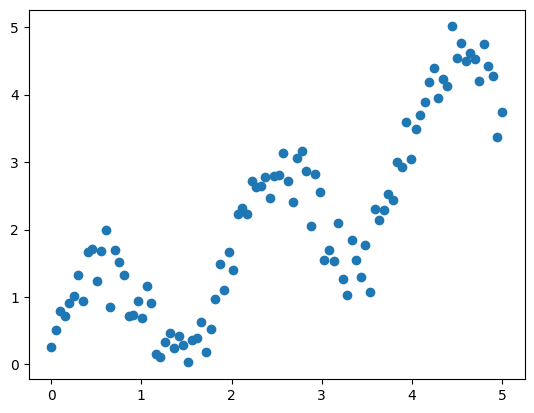

In [12]:
plt.scatter(x,y)

#### nonlinear

In [131]:
regr_lin = LinearRegression()

In [133]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [135]:
regr_lin.fit(X,y)

LinearRegression()

0.6173822011576283


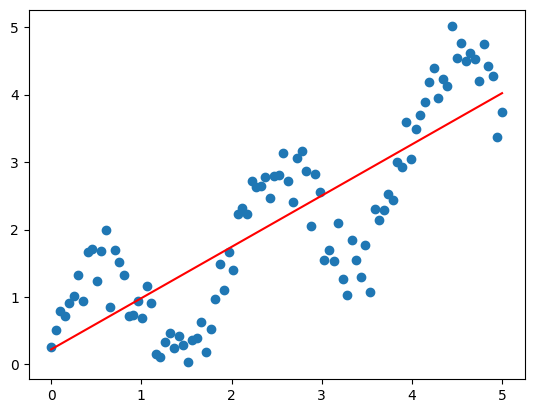

In [137]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [142]:
print(x.shape)

(100,)


In [144]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it -> K加越多，越符合模型!!!🤯
print(X_poly.shape)

(100, 5)


In [146]:
regr_poly = LinearRegression()

In [148]:
regr_poly.fit(X_poly, y)

LinearRegression()

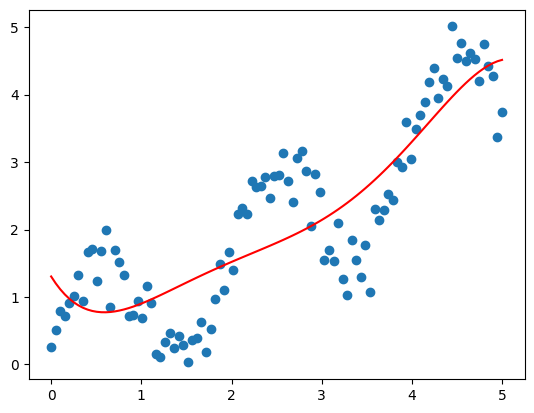

In [150]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [152]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.15023835  2.79636159 -1.30500167  0.27843832 -0.02139081]
interception:  1.3047958990882775


In [154]:
#理論算法
W=regr_poly.coef_      # 1*5的矩陣
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.3047959 , 1.20316454, 1.11481531, 1.03880367, 0.97422687,
       0.92022309, 0.87597065, 0.84068709, 0.81362839, 0.79408811,
       0.78139654, 0.77491983, 0.77405922, 0.77825011, 0.78696127,
       0.799694  , 0.81598125, 0.83538681, 0.85750443, 0.88195703,
       0.90839581, 0.93649942, 0.96597312, 0.99654795, 1.02797985,
       1.06004886, 1.09255824, 1.12533365, 1.15822228, 1.19109206,
       1.22383075, 1.25634514, 1.28856019, 1.3204182 , 1.35187794,
       1.38291384, 1.41351512, 1.44368496, 1.47343966, 1.50280777,
       1.5318293 , 1.56055481, 1.58904461, 1.61736791, 1.64560196,
       1.67383125, 1.70214659, 1.73064435, 1.75942556, 1.78859508,
       1.81826077, 1.84853265, 1.87952202, 1.91134065, 1.94409994,
       1.97791004, 2.01287905, 2.04911215, 2.08671076, 2.1257717 ,
       2.16638636, 2.20863982, 2.25261005, 2.29836703, 2.34597193,
       2.39547627, 2.44692103, 2.50033589, 2.55573829, 2.61313268,
       2.6725096 , 2.73384487, 2.79709876, 2.86221513, 2.92912

In [156]:
#也能用涵式算
regr_poly.predict(X_poly)

array([1.3047959 , 1.20316454, 1.11481531, 1.03880367, 0.97422687,
       0.92022309, 0.87597065, 0.84068709, 0.81362839, 0.79408811,
       0.78139654, 0.77491983, 0.77405922, 0.77825011, 0.78696127,
       0.799694  , 0.81598125, 0.83538681, 0.85750443, 0.88195703,
       0.90839581, 0.93649942, 0.96597312, 0.99654795, 1.02797985,
       1.06004886, 1.09255824, 1.12533365, 1.15822228, 1.19109206,
       1.22383075, 1.25634514, 1.28856019, 1.3204182 , 1.35187794,
       1.38291384, 1.41351512, 1.44368496, 1.47343966, 1.50280777,
       1.5318293 , 1.56055481, 1.58904461, 1.61736791, 1.64560196,
       1.67383125, 1.70214659, 1.73064435, 1.75942556, 1.78859508,
       1.81826077, 1.84853265, 1.87952202, 1.91134065, 1.94409994,
       1.97791004, 2.01287905, 2.04911215, 2.08671076, 2.1257717 ,
       2.16638636, 2.20863982, 2.25261005, 2.29836703, 2.34597193,
       2.39547627, 2.44692103, 2.50033589, 2.55573829, 2.61313268,
       2.6725096 , 2.73384487, 2.79709876, 2.86221513, 2.92912

#### 多項式

多項式10次方

In [159]:
X_poly_10D = np.array([[k, k**2, k**3, k**4, k**5, k**6, k**7, k**8, k**9, k**10] for k in x]) 
print(X_poly.shape)

(100, 5)


In [161]:
regr_poly_10D = LinearRegression()

In [163]:
regr_poly_10D.fit(X_poly_10D, y)

LinearRegression()

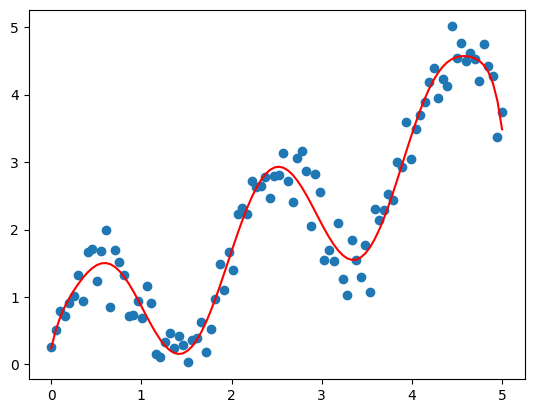

In [165]:
plt.scatter(x,y)
plt.plot(x, regr_poly_10D.predict(X_poly_10D), 'r')

#### 
RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [168]:
# 常態分布算法
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [170]:
sigma = 0.3

In [172]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [174]:
regr_rbf = LinearRegression()

In [176]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

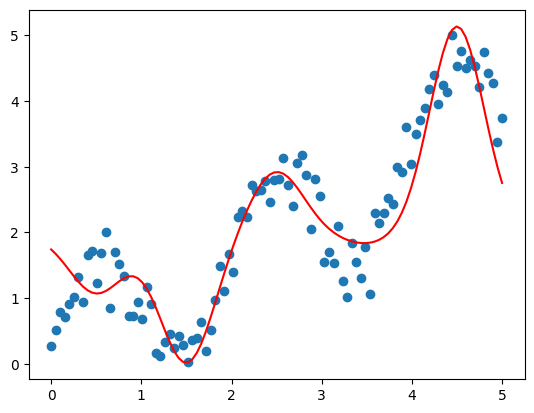

In [178]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [180]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.88317172 -1.94365422  0.96581854 -0.13896579  3.17254916]
interception:  1.9616890952628445


#### Comparison

In [183]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)
Y_poly_10D = regr_poly_10D.predict(X_poly_10D)

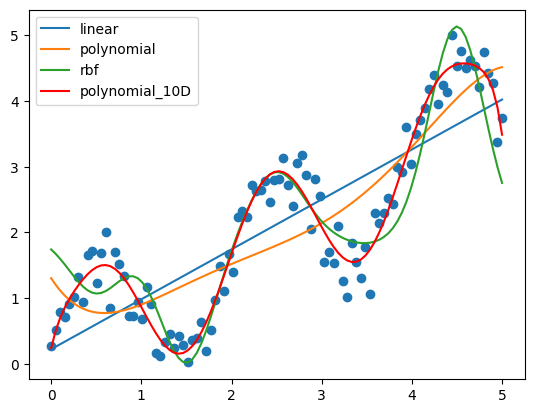

In [185]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.plot(x, Y_poly_10D, label='polynomial_10D', c='r')
plt.legend()

## 請計算模型的MSE

In [191]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6173822011576283


In [193]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5062916847587339


In [195]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24710604294903132


In [199]:
print(np.sum((regr_poly_10D.predict(X_poly_10D) - y) ** 2) / len(y))

0.07936728408066424
